# Higher-order data

XGI provides four ways for generating higher-order datasets:
1. Building node-by-node and edge-by-edge (Described in tutorial 1)
2. Generating a synthetic network from a model
3. Loading from XGI-DATA
4. Loading from a file

In this tutorial, we will describe methods 2-4.

In [1]:
import matplotlib.pyplot as plt
import xgi

## Generating synthetic data

XGI has implemented many models for generating synthetic higher-order networks. See [here](https://xgi.readthedocs.io/en/stable/api/generators.html) for a full list. We will demonstrate a few common random models here.

In [2]:
H = xgi.load_xgi_data("email-enron")
H.cleanup()

n = H.num_nodes

In [3]:
H_rand = xgi.fast_random_hypergraph(n, [0.005, 0.001], seed=2)
k = H.nodes.degree.asdict()
s = H.edges.size.asdict()
H_cl = xgi.chung_lu_hypergraph(k, s, seed=0)
H_hppm = xgi.uniform_HPPM(n, 3, 6, 0.95, seed=1)
H_sun = xgi.sunflower(5, 5, 10)

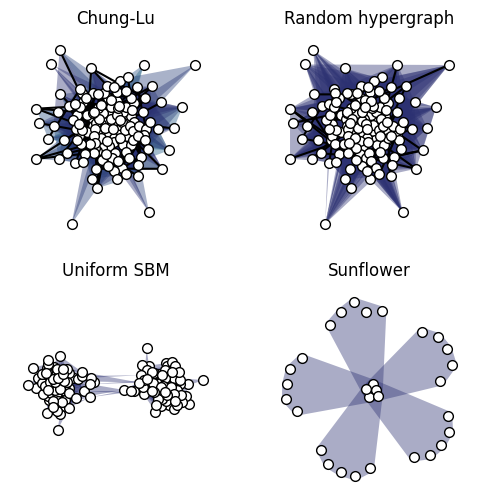

In [4]:
plt.figure(figsize=(6, 6))
pos = xgi.pca_transform(xgi.pairwise_spring_layout(H_cl))
plt.subplot(221)
plt.title("Chung-Lu")
xgi.draw(H_cl, pos=pos)
plt.subplot(222)
plt.title("Random hypergraph")
xgi.draw(H_rand, pos=pos)
plt.subplot(223)
plt.title("Uniform SBM")
pos = xgi.pca_transform(xgi.pairwise_spring_layout(H_hppm))
xgi.draw(H_hppm, pos=pos)
plt.subplot(224)
plt.title("Sunflower")
xgi.draw(H_sun, hull=True)
plt.show()

## XGI-DATA

... is an open-source repository of higher-order datasets in standard JSON format:
* 27 datasets and counting
* A [**table**](https://xgi.readthedocs.io/en/stable/xgi-data.html) of the datasets with their basic statistics
* Hosted on Zenodo 

First, let's see all the datasets that are available:

In [5]:
xgi.load_xgi_data()  # calling this function without arguments returns the list of all datasets

Available datasets are the following:
coauth-dblp
coauth-mag-geology
coauth-mag-history
congress-bills
contact-high-school
contact-primary-school
dawn
diseasome
disgenenet
email-enron
email-eu
eventernote-events
eventernote-places
hospital-lyon
house-bills
house-committees
hyperbard
hypertext-conference
invs13
invs15
kaggle-whats-cooking
malawi-village
ndc-classes
ndc-substances
plant-pollinator-mpl-014
plant-pollinator-mpl-015
plant-pollinator-mpl-016
plant-pollinator-mpl-021
plant-pollinator-mpl-034
plant-pollinator-mpl-044
plant-pollinator-mpl-046
plant-pollinator-mpl-049
plant-pollinator-mpl-057
plant-pollinator-mpl-062
recipe-rec
science-gallery
senate-bills
senate-committees
sfhh-conference
tags-ask-ubuntu
tags-math-sx
tags-stack-overflow
threads-ask-ubuntu
threads-math-sx
threads-stack-overflow


Let's select a dataset.

In [6]:
H = xgi.load_xgi_data("email-eu")
print(H)

Hypergraph named email-Eu with 1005 nodes and 235263 hyperedges


We can easily exclude edges larger than a certain size:

In [7]:
H2 = xgi.load_xgi_data("email-eu", max_order=2)
print(H2)

Hypergraph named email-Eu with 1005 nodes and 217012 hyperedges


We look at some of the statistics of the original dataset:

In [8]:
print(
    "The dataset is connected"
    if xgi.is_connected(H)
    else "The dataset is not connected"
)
print(f"The unique edge sizes are \n{xgi.unique_edge_sizes(H)}")

The dataset is not connected
The unique edge sizes are 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40]


### Cleaning up

XGI provides a method called `cleanup` to easily tidy up higher-order datasets. Operations that `cleanup` can perform:
* Removing isolated nodes
* Removing singleton edges
* Removing multiedges
* Renaming nodes and edges to a standard labeling scheme
* Removing nodes and edges that are not part of the giant component

For example:

In [9]:
print(H.nodes)
print(H)
print(xgi.is_connected(H))

['2', '1', '4', '3', '5', '7', '6', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '19', '18', '20', '21', '22', '23', '32', '40', '39', '26', '25', '35', '34', '29', '24', '37', '28', '38', '31', '27', '36', '41', '33', '30', '43', '42', '44', '45', '47', '46', '48', '49', '50', '51', '52', '54', '53', '55', '60', '58', '56', '59', '57', '61', '62', '63', '64', '66', '65', '68', '67', '69', '70', '71', '72', '73', '75', '74', '77', '76', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '92', '91', '93', '95', '94', '96', '97', '100', '102', '98', '101', '99', '103', '104', '105', '106', '107', '108', '112', '109', '113', '110', '111', '114', '115', '116', '117', '119', '118', '120', '121', '122', '124', '123', '125', '126', '127', '128', '130', '131', '129', '132', '133', '134', '135', '136', '137', '139', '138', '140', '141', '143', '142', '144', '145', '146', '148', '147', '149', '150', '151', '152', '154', '153', '156', '155', '157', '158', '

In [10]:
H.cleanup()
print(H.nodes)
print(H)
print(xgi.is_connected(H))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

...don't worry, the old label is still there!

In [11]:
H.nodes[0]

{'label': '2'}

In [12]:
# Save the file
xgi.download_xgi_data("email-enron")
# this now lives in email-enron.json

/Users/yyu8dx/Documents/GitHub/xgi/xgi/readwrite/json.py:40: UserWarning: This function is deprecated in favor of the 'write_hif()' function
  warn("This function is deprecated in favor of the 'write_hif()' function")


In [13]:
Hlocal = xgi.load_xgi_data("email-enron", read=True)  # now we are loading locally!
print(Hlocal)

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


/Users/yyu8dx/Documents/GitHub/xgi/xgi/readwrite/json.py:106: UserWarning: This function is deprecated in favor of the 'read_hif()' function
  warn("This function is deprecated in favor of the 'read_hif()' function")


## Read and write

XGI offers 4 different formats to read and write:
* JSON (same format as XGI-DATA)
* Hyperedge list
* Bipartite edge list
* Incidence matrix

Starting with the JSON, this is identical to the format of XGI-DATA datasets. A benefit of this format is that it stores attributes of nodes, edges, and the hypergraph.

In [14]:
# Write the example hypergraph to a JSON file
xgi.write_json(Hlocal, "hypergraph_json.json")
# Load the file just written and store it in a new hypergraph
H_json = xgi.read_json("hypergraph_json.json")

We can also read/write a hyperedge list. In this case, each line tabulates the node ids of each edge. Pros: compact. Cons: Can't store attributes.

In [15]:
# Write the hypergraph to a file as a hyperedge list
xgi.write_edgelist(H, "hyperedge_list.csv", delimiter=",")
# Read the file just written as a new hypergraph
H_el = xgi.read_edgelist("hyperedge_list.csv", delimiter=",", nodetype=int)

Lastly, we can read/write an incidence matrix. In this format, rows represent the node IDs, and the columns represent the edge IDs. Pros: Easy to convert to a Numpy array or Pandas dataframe. Cons: Non-compact representation, no attributes, not easily readable.

In [16]:
# Write the hypergraph as a bipartite edge list
xgi.write_incidence_matrix(H, "incidence.csv", delimiter=",")
# Read the file just written as a new hypergraph
H_bel = xgi.read_incidence_matrix("incidence.csv", delimiter=",")

We can read/write a bipartite edgelist. In this format, each line is composed of two entries: column 1 is the ID of the node, and column 2 is the edge to which that node belongs. Pros: fixed number of columns, compact. Cons: again, no attributes.

## Challenge

* What is the average multiplicity of an edge in the `contact-high-school` dataset? Hint: use `cleanup()`.
* Load the `congress-bills` dataset excluding edges of order 11 and larger and save it as a tab-delimited hyperedge list.